In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important; }</style>"))

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import seaborn as sns
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as plticker

def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
             # 'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in",
              'legend.fontsize': 20}
    mpl.rcParams.update(rcparams) 

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = '#3690c0'

stdrcparams(usetex=True)
figsize=stdfigsize(ratio=-1)
xs,ys=figsize

def custom_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x',length=10,direction='out')
    ax.tick_params(axis='x',which='minor',direction='out')
    ax.tick_params(axis='y',length=10,direction='out')
    ax.tick_params(axis='y',which='minor',direction='out')

In [4]:
import pickle
import itertools
import math
import random
import pandas as pd
import numpy as np
import networkx as nx

from datetime import date

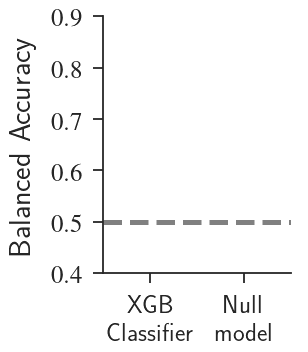

In [11]:
df = pd.concat([pd.DataFrame(dict(Model='XGB \n Classifier',Accuracy=[0])),                               
                pd.DataFrame(dict(Model='Null \n model',Accuracy= [0]))])
fig,ax = plt.subplots(figsize=(5,5))
ax = sns.boxplot(x="Model", y="Accuracy",palette='Paired', data=df,ax=ax,linewidth=2)
plt.xticks(rotation=0, ha='center')
custom_frame(ax)
plt.ylabel('Balanced\ Accuracy')
plt.xlabel('')
plt.tight_layout()
ax.axhline(y=0.5, linestyle = '--',color ='grey')
plt.ylim(0.4,0.9)
plt.savefig('../Figs/fig3_model.pdf',transparent=True)
plt.show()

In [5]:
# df_air = pd.read_pickle('../data/networks/US_air_1990_2018.pkl')
# df_air = df_air[df_air.source != df_air.target]
# df_air = df_air.reset_index()
# df_air = df_air[df_air.YEAR>=2004].set_index(['YEAR','MONTH'])
# year = list(df_air.index.get_level_values(0).unique())
# month = list(df_air.index.get_level_values(1).unique())
# graphs_air = []
# date_air = []
# for y in year:
#     for m in month:
# #        if y != 2018 or m != 12:
#         df = df_air.loc[y,m]
#         date_air.append(date(y,m,1))
#         G = nx.from_pandas_edgelist(df_air.loc[y,m], edge_attr=True)
#         graphs_air.append(G)
# del df_air

In [6]:
# def match_datasets(data):
#     allcities=pd.read_csv("../data/buses_list_of_cities.csv",index_col=0,names=["CityUF"],encoding="utf-8")
#     allcities.head()    
#     allcities["CityUF"]=allcities["CityUF"].str.upper()
#     allcities["CityUF"]=allcities["CityUF"].str.strip()
#     allcities["CityUF"]=allcities["CityUF"].str.replace(" , ",", ")
#     allcities["CityUF"]=allcities["CityUF"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#     setallcities=set(list(allcities.CityUF.astype(str)))    
#     data=data[data['ORIGEM'].isin(list(setallcities))]
#     data=data[data['DESTINO'].isin(list(setallcities))]    
#     return data

# def bus_network(year=2010,month=12):
#     data=pd.read_csv("../data/cleaned_buses_data/{}.csv".format(year),index_col=None)
#     if month is not False:
#         data=data[data.MES==month]
#     data=data[data.NUMEROLUGAROFERTADOIDA>0]
#     data=match_datasets(data)
#     data=data[["ORIGEM","DESTINO"]]
#     data=data.groupby(data.columns.tolist()).size().reset_index().rename(columns={0:'weight'})
#     data=data.rename(columns={'ORIGEM':'source','DESTINO':'target','NUMEROLUGAROFERTADOIDA':'weight'})
#     return data

# df_bus = pd.read_pickle('../data/networks/bus_2005_2014.pkl')
# df_bus = df_bus[df_bus.source != df_bus.target]
# year = list(df_bus.index.get_level_values(0).unique())
# month = list(df_bus.index.get_level_values(1).unique())
# del df_bus
# graphs_bus = []
# date_bus = []
# for y in year:
#     for m in month:
#         df = bus_network(y,m)
#         date_bus.append(date(y,m,1))
#         G = nx.from_pandas_edgelist(df, edge_attr=True)
#         graphs_bus.append(G)

In [7]:
# pickle.dump(graphs_air, open("../data/figure_data/air_temporal_networks.pickle.dat", "wb"))
# pickle.dump(graphs_bus, open("../data/figure_data/bus_temporal_networks.pickle.dat", "wb"))

In [8]:
graphs_air = pickle.load(open("../data/figure_data/air_temporal_networks.pickle.dat", "rb"))
graphs_bus = pickle.load(open("../data/figure_data/bus_temporal_networks.pickle.dat", "rb"))

In [43]:
data = pd.read_pickle('../results/us_air_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
# data['passenges_centrality'] = data['passenges_centrality'].astype(np.int64)
data = data[data.year>=date(2004,1,1)]
rename_dict = {}
for column in data.columns:
    if '_index' in column:
        column_v = column.replace('_index','',1)
    else:
        column_v =  column
    rename_dict[column]=column_v.replace('_',' ',3).title()
    
rename_again = {'Common Neighbor' : 'CN', 'Salton':'SA' , 'Jaccard':'JA', 'Sorensen':'SO', 'Hub Promoted':'HPI',
       'Hub Depressed':'HDI', 'Leicht Holme Newman':'LHNI', 'Preferential Attachment':'PA',
       'Adamic Adar':'AA', 'Resource Allocation':'RA', 'Local Path':'LP'}
    
data_air = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})

columns=['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
       'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
       'Adamic Adar', 'Resource Allocation', 'Local Path',
        'Year','Edge','Time','Label']

data_air =  data_air[columns].rename(columns=rename_again)

In [44]:
data = pd.read_pickle('../results/brazil_bus_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
data_bus = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})
data_bus =  data_bus[columns].rename(columns=rename_again)

In [21]:
# import essential packages
import cartopy.crs as ccrs
import cartopy as cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from cartopy.io import shapereader
from matplotlib.lines import Line2D

In [84]:
#function to convert node name to readable form
def make_node_name(node):
    node = node.title()
    text = node.split('_')    
    if len(text)<3:
        return ','.join([text[0],text[1].upper()])
    else:
        city = ' '.join(text[0:-1])
        state = text[-1]
        state = state.upper()
        return ','.join([city,state])

def plot_air_graph(loc):
    #nodes position information
    pos = pd.read_pickle('../data/US_air_geo_information.pkl')

    #prepare labels for edges
    labels = ['Retained Edge', 'Removed Edge'] # this order is fixed
    colors = ['black', 'red']
    styles = ['solid', 'dashed']
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle= s) for c,s in zip(colors,styles)]

    #select snapshot for displaying 
    year = date(2014,1,1)
    G = graphs_air[date_air.index(year)]
    H = graphs_air[date_air.index(year) + 1]

    #edges separation
    ## the edges that are in mainland us
    edges_in_land = [edge for edge in G.edges() if (pos[edge[0]].lng >= -128 and pos[edge[0]].lng <= -65 and pos[edge[1]].lng >= -128 and pos[edge[1]].lng <=-65)]
    edges_in_land = [edge for edge in edges_in_land if (pos[edge[0]].lat >= 23 and pos[edge[1]].lat >= 23)]


    border = [-125,-67,25,50] # xmin_xmax_ymin_ymax

#     sizex = stdfigsize(ratio=-1)[0]
#     sizey = sizex*(border[3]-border[2])/(border[1]-border[0])
#     fig = plt.figure(figsize=(xs,ys))

    ax = fig.add_subplot(loc, projection=ccrs.PlateCarree())
    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    shp = shapereader.Reader(states_shp)
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    for record, state in zip(shp.records(), shp.geometries()):
        name = record.attributes['name']
        facecolor = '#f0f0f0'
        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor='none',zorder=-1)
    ax.set_extent(border, crs=ccrs.PlateCarree())

    #draw edges
    nx.draw(G,
            pos = pos,
            width= 0.1,
            alpha= 0.15,
            node_size = 0,
            edgelist= edges_in_land,
            edge_color = 'black',
            style = 'solid')

    #draw nodes
    nx.draw(G,
            pos = pos,
            node_color = '#377eb8',
            width= 0,
            alpha= 1,
            node_size = np.array(list(dict(G.degree()).values()))/2)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    ax.set_title('Air, US (Jan. 2014)')
    return(ax)

In [85]:
def change_case(df):
    df["CityUF"]=df["CityUF"].str.upper()
    df["CityUF"]=df["CityUF"].str.strip()
    df["CityUF"]=df["CityUF"].str.replace(" , ",", ")
    df["CityUF"]=df["CityUF"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    return df

def plot_bus_graph(loc):
    pos = change_case(pd.read_excel('../data/brazilian_data.xls', 
                                sheetname='Geographical location'))[['CityUF','Longitude',"Latitude"]].set_index('CityUF').T


    #select snapshot for displaying 
    year = date(2014,1,1)
    G = graphs_bus[date_bus.index(year)]
    H = graphs_bus[date_bus.index(year) + 1]

 
    ax = fig.add_subplot(loc, projection=ccrs.PlateCarree())
    kww = dict(resolution='50m', category='cultural',
                      name='admin_1_states_provinces')
    states_shp = shapereader.natural_earth(**kww)
    shp = shapereader.Reader(states_shp)
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    for record, state in zip(shp.records(), shp.geometries()):
        name = record.attributes['name']
        facecolor = '#f0f0f0'
        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor='none',zorder=-1)
    ax.set_extent([-74.5, -34.5, -32.5, 5.5])

    #draw edges
    nx.draw(G,
            pos = pos,
            width= 0.1,
            alpha= 0.05,
            node_size = 0, 
            edge_color = 'black',
            style = 'solid')

    #draw nodes
    nx.draw(G,
            pos = pos,
            node_color = '#3182bd',
            width= 0,
            alpha= 0.8,
            node_size = np.array(list(dict(G.degree()).values()))/5)
    ax.set_title('Bus, Brazil (Jan. 2014)')
    return(ax)

In [86]:
def plot_air_removal(loc):
    ax = fig.add_subplot(loc)
    ax.set_ylabel('Removed fraction')  # we already handled the x-label with ax1
    ax.set_xlabel('Time')
    index = date_air.index(date(2004,1,1))
    ax.plot(date_air[index:-2],[len(data_air[data_air.Year == year][data_air.Label == 1])/len(data_air[data_air.Year == year]) for year in date_air[index:-2]],alpha=0.6,zorder=1)
    ax.tick_params(axis='y')
    custom_frame(ax)
    return(ax)

In [87]:
def plot_bus_removal(loc):
    ax = fig.add_subplot(loc)
    ax.set_ylabel('Removed fraction')  # we already handled the x-label with ax1
    ax.set_xlabel('Time')
    index = date_bus.index(date(2005,1,1))
    ax.plot(date_bus[index:-2],[len(data_bus[data_bus.Year == year][data_bus.Label == 1])/len(data_bus[data_bus.Year == year]) for year in date_bus[index:-2]],alpha=0.6,zorder=1)
    ax.tick_params(axis='y')
    ax.set_xticks(ax.get_xticks()[::2])
    custom_frame(ax)
    return(ax)

In [ ]:
fig = plt.figure(figsize=(2.8*xs,1.8*ys),constrained_layout=False)
gs = fig.add_gridspec(nrows=7, ncols=11, left=0.05, right=0.48, wspace=0.5,hspace=-0.2)
ax1=plot_bus_graph(gs[0:5,0:4])
ax1.text(-0.1, 1.1, 'A', transform=ax1.transAxes,
      fontsize=30, fontweight='bold', va='top', ha='right')
ax2=plot_air_graph(gs[0:5,4:11])
ax2.text(0.5, 1.1, 'B', transform=ax2.transAxes,
      fontsize=30, fontweight='bold', va='top', ha='right')
ax3=plot_bus_removal(gs[5:6,0:5])
ax3.text(-0.1, 1.3, 'C', transform=ax3.transAxes,
      fontsize=30, fontweight='bold', va='top', ha='right')
ax4=plot_air_removal(gs[5:6,6:11])
ax4.text(-0.1, 1.3, 'D', transform=ax4.transAxes,
      fontsize=30, fontweight='bold', va='top', ha='right')
plt.show()